# Table of Contents
 <p>

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from pyseqlogo.pyseqlogo import draw_logo, setup_axis, draw_protein
from pyseqlogo.format_utils import read_alignment, calc_relative_information, format_matrix
from Bio import motifs

data = '../data/K562_MAFF_all_m_lcr_100.fa_archs.txt'

Populating the interactive namespace from numpy and matplotlib


In [2]:
archlines = open(data).read().splitlines()

maxarch = max([int(x.split()[0]) for x in archlines])

if all:
    maxarch += 1
archlist = [[] for n in range(maxarch)]
for l in archlines:
    if len(l.split())>3:
        archlist[int(l.split()[0])-1] += [l.split()[-2]]
    else:
        archlist[int(l.split()[0])-1] += [l.split()[-1]]
    if all:
        archlist[-1] += [archlist[int(l.split()[0])-1][-1]]


In [8]:

for cluster_index in range(maxarch):
    fasta = ''
    cluster = archlist[cluster_index]
    for index, seq in enumerate(cluster):
        if 'N' not in seq:
            fasta += '>seq{}-{}\n{}\n'.format(cluster_index+1,index+1, seq)
    with open('../data/K562_MAFF_all_m_lcr_100.fa_archs.{}.fasta'.format(cluster_index), 'w') as f:
        f.write(fasta)

In [3]:
fasta = ''
for cluster_index, cluster in enumerate(archlist):
    for index, seq in enumerate(cluster):
        if 'N' not in seq:
            fasta += '>seq{}-{}\n{}\n'.format(cluster_index+1,index+1, seq)
        
    

In [4]:
with open('../data/K562_MAFF_all_m_lcr_100.fa_archs.fasta', 'w') as f:
    f.write(fasta)

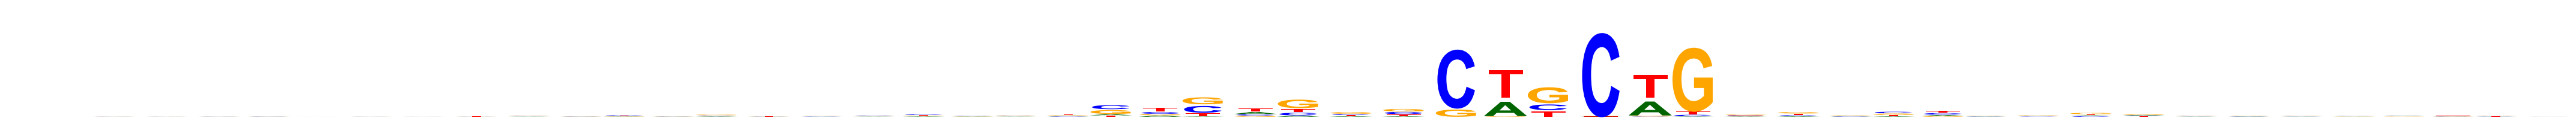

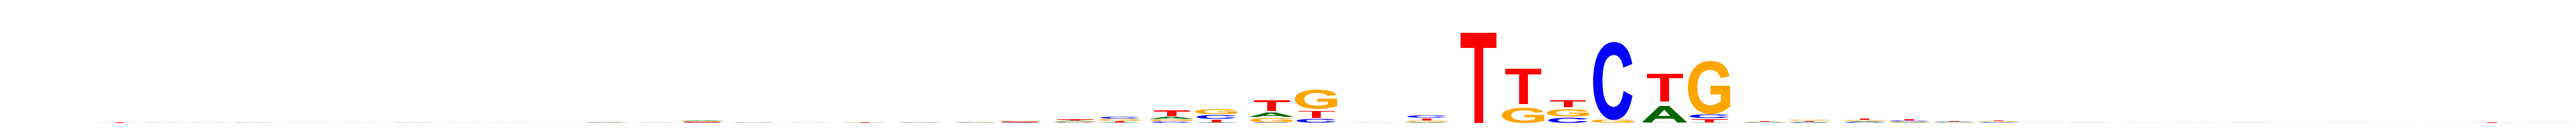

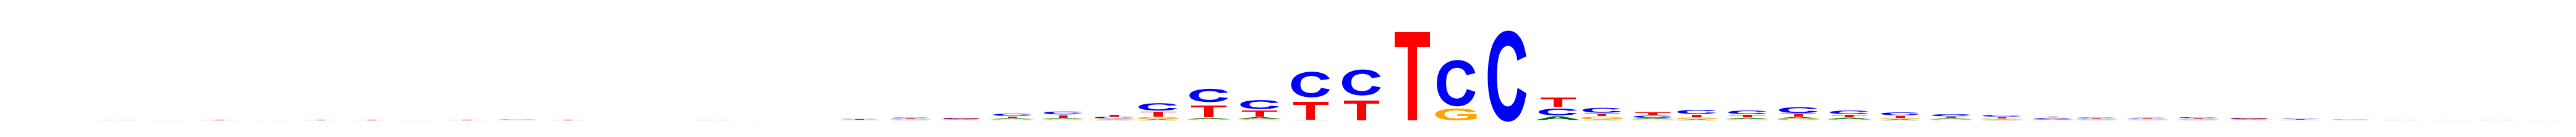

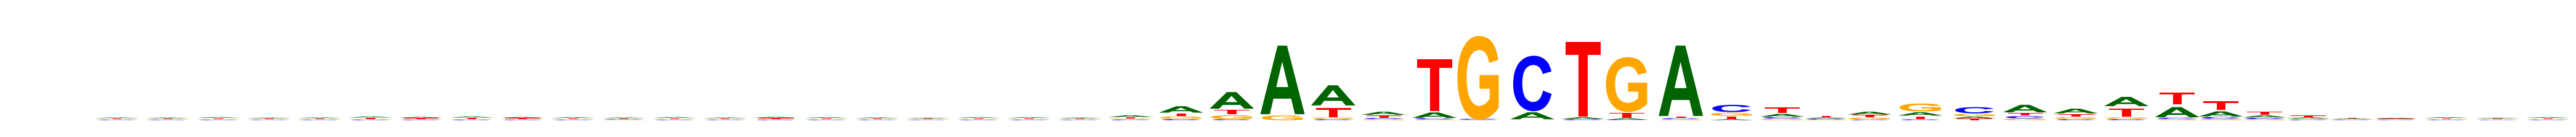

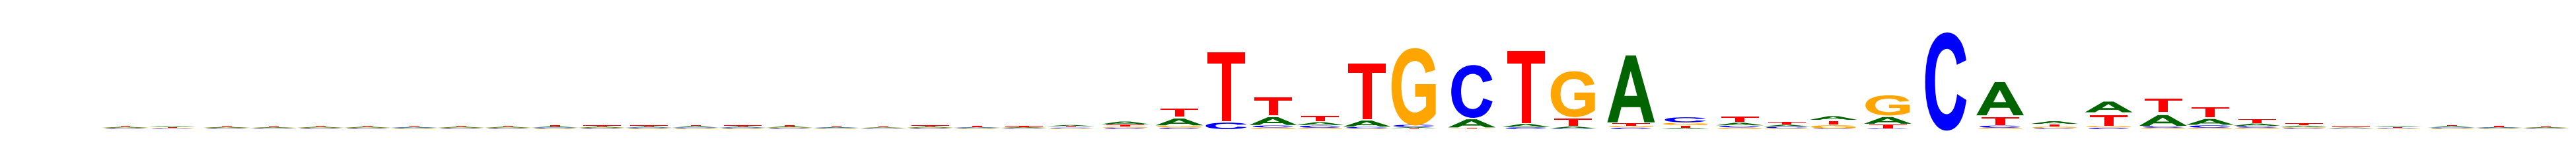

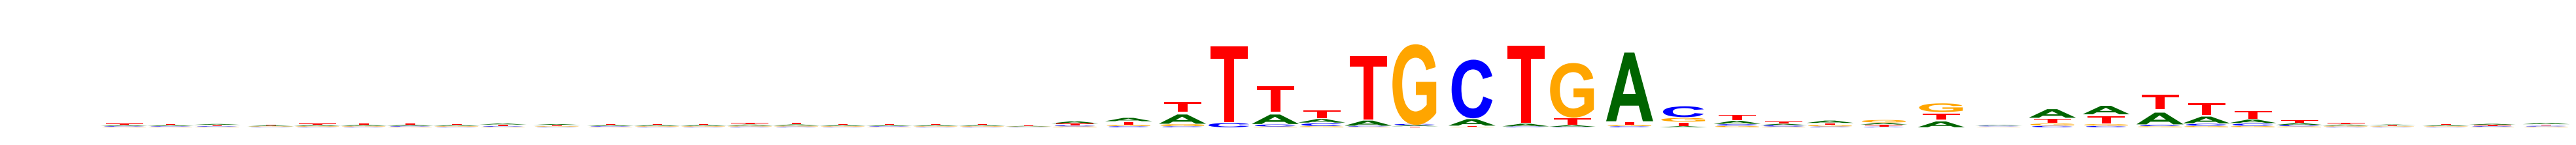

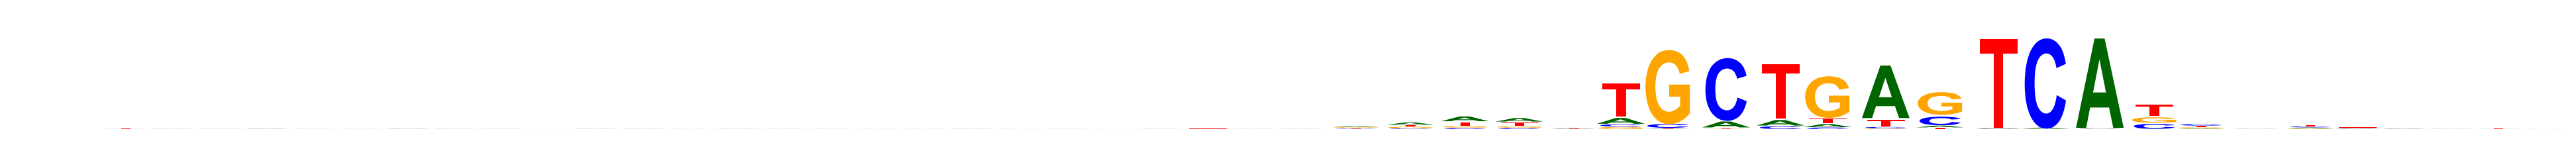

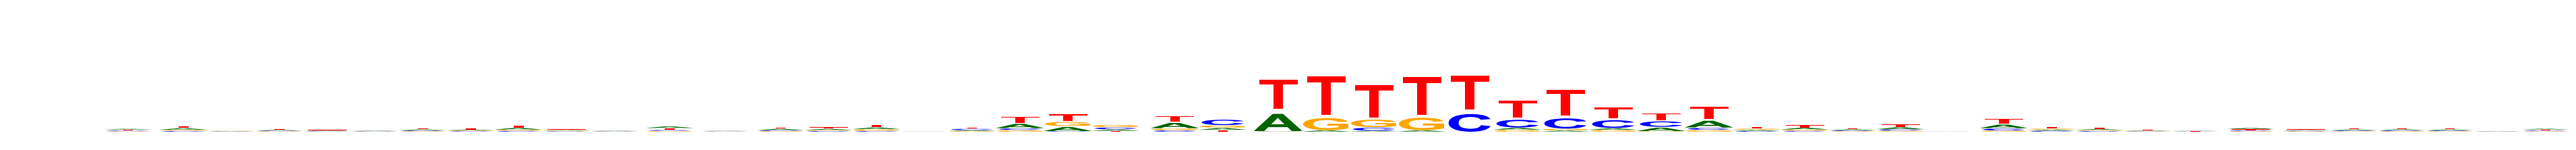

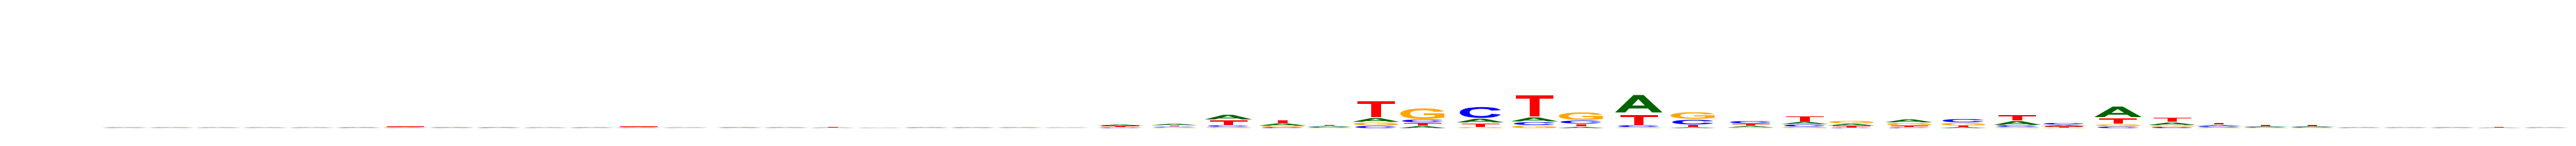

In [10]:
for cluster_index in range(maxarch):
    fig, axarr = draw_logo('../data/K562_MAFF_all_m_lcr_100.fa_archs.{}.fasta'.format(cluster_index), 
                           data_type='fasta')
    fig.tight_layout()